<a href="https://colab.research.google.com/github/Nilaypandya/house-price-prediction/blob/main/ml23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
dataset=pd.read_csv('/content/1553768847-housing.csv')
dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [93]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [94]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [95]:
dataset.keys()

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [96]:

dataset.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
5,-122.25,37.85,52,919,213.0,413,193,4.0368,NEAR BAY,269700
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,NEAR BAY,299200
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,NEAR BAY,241400
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,NEAR BAY,226700
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,NEAR BAY,261100


In [97]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the 'ocean_proximity' column
dataset['ocean_proximity'] = label_encoder.fit_transform(dataset['ocean_proximity'])

# Display the first few rows with the updated column
display(dataset.head())


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [98]:
dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].mode()[0],inplace=True)

/tmp/ipython-input-4014416453.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["total_bedrooms"].fillna(dataset["total_bedrooms"].mode()[0],inplace=True)


In [99]:
dataset.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
ocean_proximity,0
median_house_value,0


In [100]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,535.284351,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,420.053240,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


<Axes: >

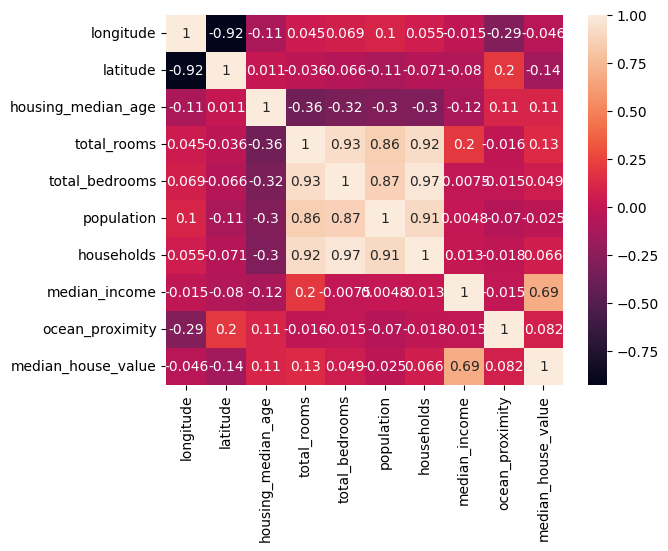

In [101]:
sns.heatmap(dataset.corr(),annot=True)

In [102]:
##independent feature & dependent feature
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [103]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3


In [104]:
y.head()

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200


In [105]:
from sklearn.model_selection import train_test_split

In [106]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=10)

In [107]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13828, 9), (6812, 9), (13828,), (6812,))

In [108]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [109]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)



model train

In [110]:
from sklearn.linear_model import LinearRegression

In [111]:
lr=LinearRegression()

In [120]:
lr.fit(X_train, y_train)

LinearRegression()

In [113]:
lr.coef_

array([[-0.74773936, -0.79803592,  0.12843227, -0.12044061,  0.26638129,
        -0.34709915,  0.24800657,  0.65138717,  0.0047738 ]])

In [114]:
lr.intercept_

array([9.63908188e-16])

In [115]:
y_pred_test_scaled = lr.predict(X_test)
y_pred_test = y_scaler.inverse_transform(y_pred_test_scaled.reshape(-1, 1)).flatten()
y_pred_test

array([278582.45654176, 276910.93383584, 266534.84168034, ...,
       316179.09641704,  67978.57088269, 178423.91097322])

In [116]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [117]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

4940061925.210188
51404.07459085142
70285.57409035077


In [118]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred_test)
r2

0.6364467928743469

In [119]:
1-(1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6359657609919401

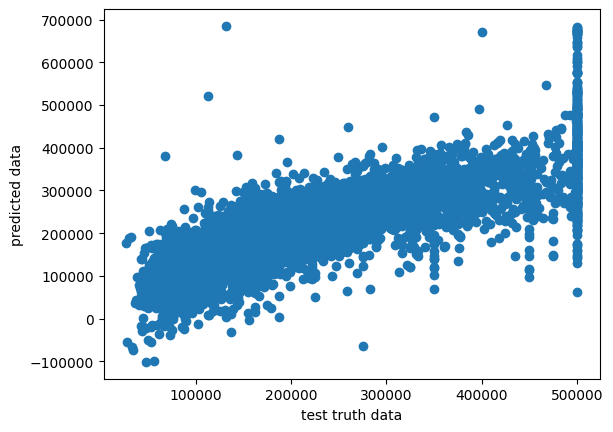

In [122]:
plt.scatter(y_test,y_pred_test)
plt.xlabel("test truth data")
plt.ylabel("predicted data")
plt.show()

In [123]:
resudial=y_test-y_pred_test
resudial

,median_house_value
20303,-111182.456542
16966,77189.066164
10623,-106334.841680
6146,-4047.080040
2208,-60567.153933
...,...
13490,-28131.909801
9340,27323.991952
17439,-143779.096417
2602,15821.429117


/tmp/ipython-input-77247058.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(resudial,kde=True,)


<Axes: xlabel='median_house_value', ylabel='Density'>

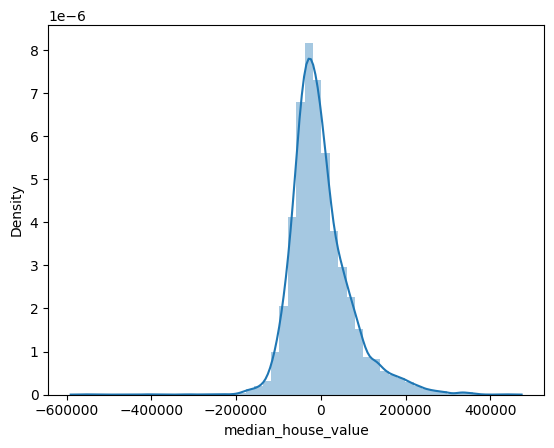

In [125]:
sns.distplot(resudial,kde=True,)

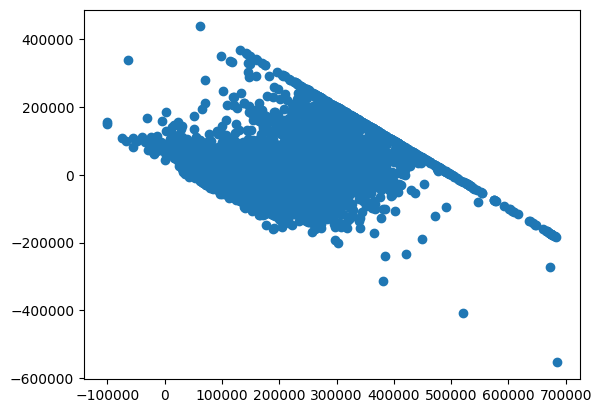

In [126]:
plt.scatter(y_pred_test,resudial)

pickle


In [129]:
import pickle
pickle.dump(lr,open("lr.pkl",'wb'))

In [130]:
model=pickle.load(open("lr.pkl",'rb'))

In [131]:
model.predict( X_test)

array([278582.45654176, 276910.93383584, 266534.84168034, ...,
       316179.09641704,  67978.57088269, 178423.91097322])